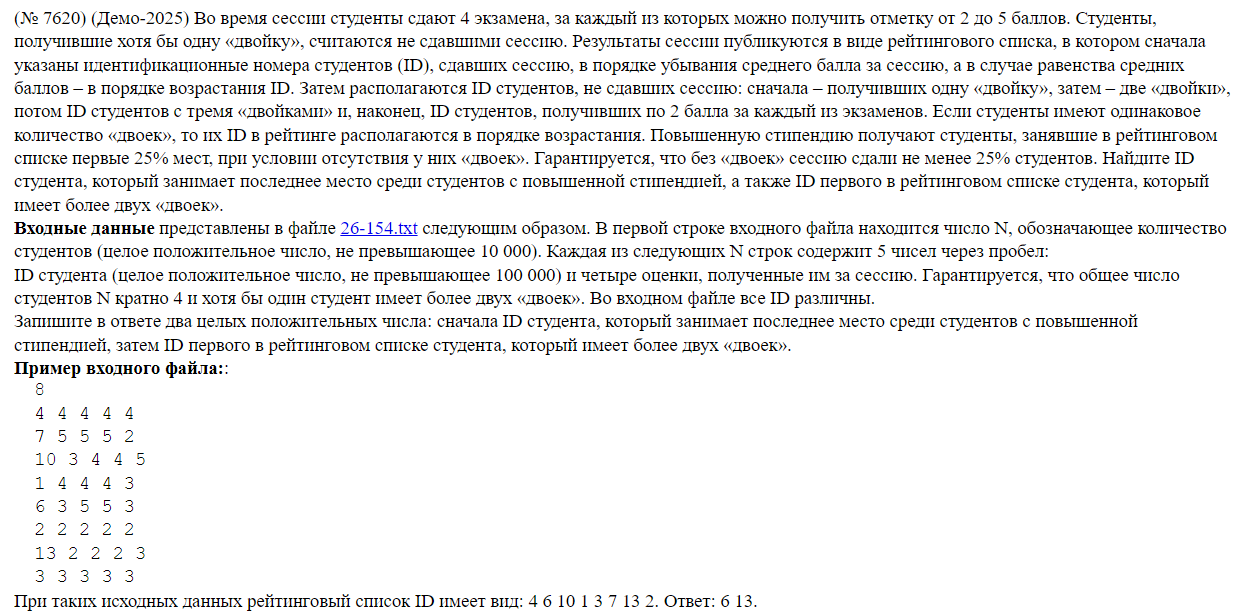

In [38]:
with open('26-154.txt') as f:
    n = int(f.readline())
    data = []
    for line in f.readlines():
        if line.strip() == '':
            continue
        id, *marks = map(int, line.split(' '))
        data.append([id, sum(x == 2 for x in marks), sum(marks) / 4])
        # x: {0:id, 1:count_of_2, 2:average}
data.sort(key=lambda x: (x[1], -x[2], x[0]))
print(data[n // 4 - 1][0], list(x[0] for x in data if x[1] == 3)[0])

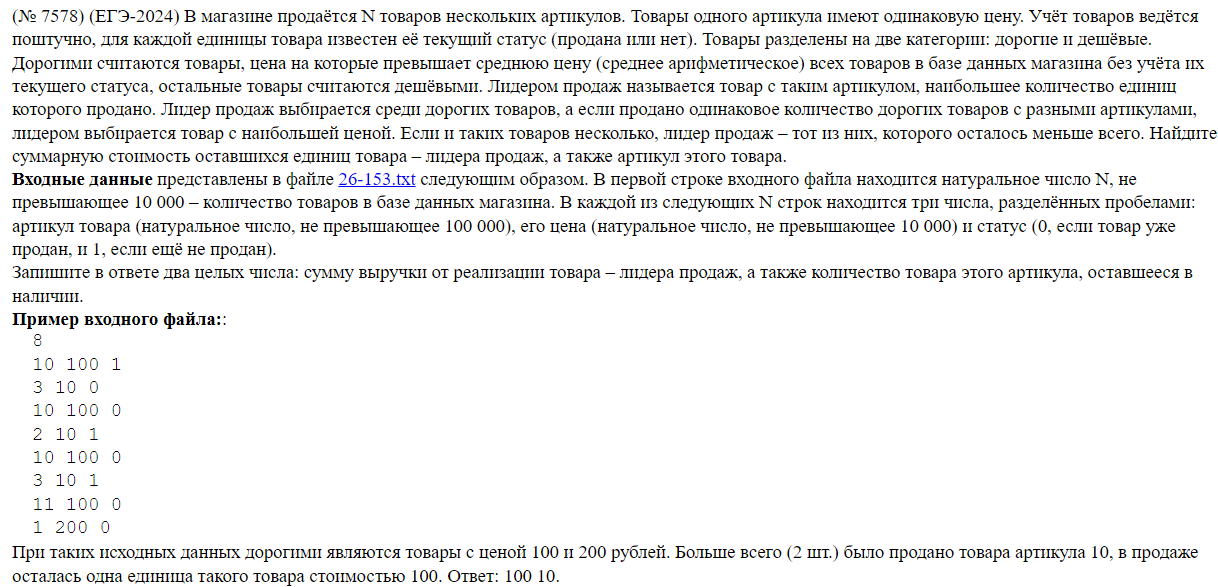

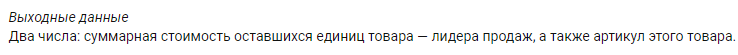

In [74]:
with open('26-153.txt') as f:
    n = int(f.readline())
    data = {}
    average = 0
    for line in f.readlines():
        if line.strip() == '':
            continue
        id, price, status = map(int, line.split(' '))
        average += price
        item = data.get(id)
        if item is None:
            data[id] = [price, int(status == 0), int(status == 1)]
        else:
            item[1] += status == 0
            item[2] += status == 1
    average /= n

def sorter(x):
    id, (price, sold, exist) = x
    return price > average, sold, price, -exist

data = sorted(data.items(), key=sorter)

def printer(x):
    id, (price, sold, exist) = x
    print(price * exist, id) # сколько ещё можно выручить с реализации, артикул

printer(data[-1])

36892 45510


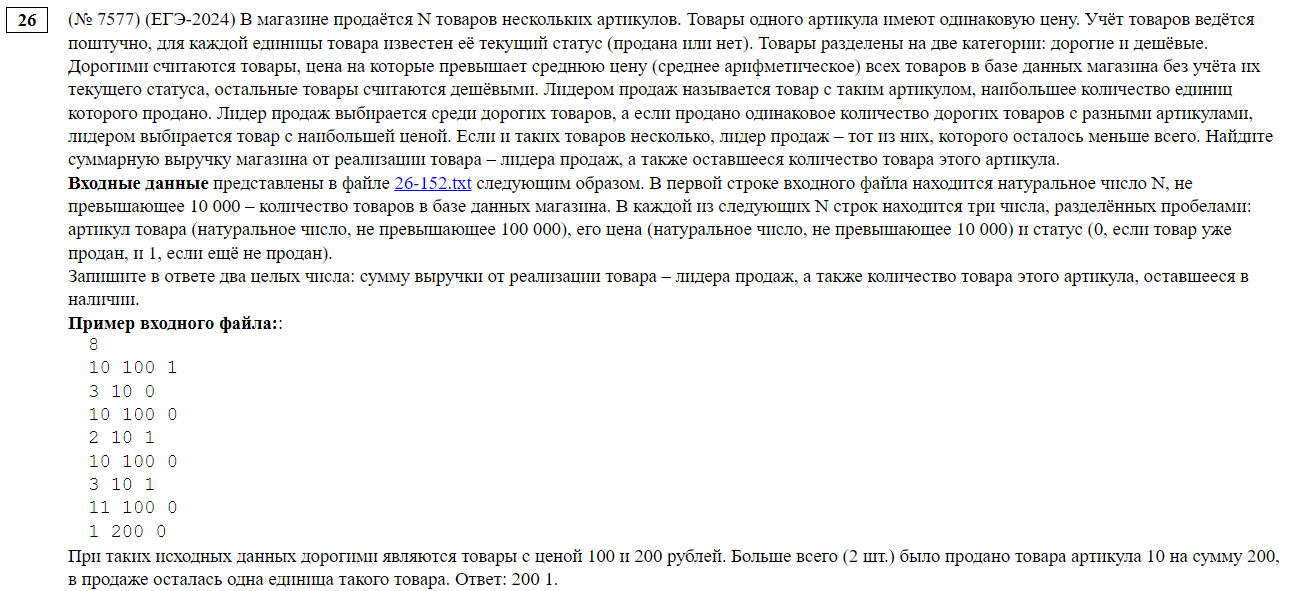

In [75]:
with open('26-152.txt') as f:
    n = int(f.readline())
    data = {}
    average = 0
    for line in f.readlines():
        if line.strip() == '':
            continue
        id, price, status = map(int, line.split(' '))
        average += price
        item = data.get(id)
        if item is None:
            data[id] = [price, int(status == 0), int(status == 1)]
        else:
            item[1] += status == 0
            item[2] += status == 1
    average /= n

def sorter(x):
    id, (price, sold, exist) = x
    return price > average, sold, price, -exist

data = sorted(data.items(), key=sorter)

def printer(x):
    id, (price, sold, exist) = x
    print(price * sold, exist) # сколько уже выручили с реализации, сколько осталось

printer(data[-1])

43656 36


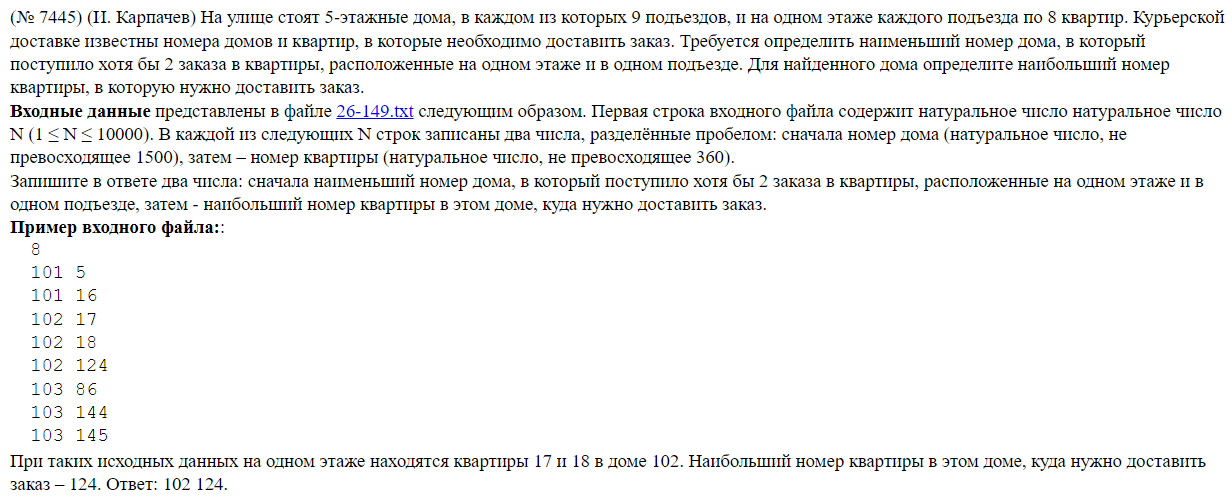

In [104]:
# 40 квартир на подъезд
# 8 квартир на этаж
# (apt - 1) // 40 + 1- подъезд
# ((apt - 1) % 40) // 8 + 1 - этаж
from collections import defaultdict

def detector(apt):
    entr = (apt - 1) // 40 + 1
    floor = ((apt - 1) % 40) // 8 + 1
    return (entr, floor)

with open('26-149.txt') as f:
    n = int(f.readline())
    data = defaultdict(list)
    average = 0
    for line in f.readlines():
        if line.strip() == '':
            continue
        bld, apt = map(int, line.split(' '))
        entr, floor = detector(apt)
        data[(bld, entr, floor)].append(apt)

def sorter(x):
    (bld, entr, floor), apts = x
    return len(apts) >= 2, -bld

data = sorted(data.items(), key=sorter)
exp_bld = data[-1][0][0]
print(exp_bld, max(max(apts) for (bld, *_), apts in data if bld == exp_bld))

584 295
